In [58]:
# Import libraries

import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import probplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_excel('Data_Train.xlsx')
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [3]:
data.shape

(10683, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# 1. Missing value treatment

In [5]:
# Check for missing values
missing_df = data.isnull().sum()
missing_df = missing_df[missing_df != 0]
missing_df = pd.DataFrame(missing_df, columns = ['Missing Count'])
missing_df

,Missing Count
Route,1
Total_Stops,1


As we have only few record missing we can drop the record

In [6]:
data = data.dropna()

In [7]:
data = data.reset_index(drop = True)

In [8]:
data.shape

(10682, 11)

In [9]:
data[data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10593,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10615,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10633,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10671,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [10]:
data.drop_duplicates(keep = 'first', inplace = True)

# 2. Exploratory Data analysis 

D:\Program Files\Anaconda\envs\FlightPricePrediction-Regression\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Vistara Premium economy'),
  Text(1, 0, 'Vistara'),
  Text(2, 0, 'Trujet'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers Premium economy'),
  Text(5, 0, 'Multiple carriers'),
  Text(6, 0, 'Jet Airways Business'),
  Text(7, 0, 'Jet Airways'),
  Text(8, 0, 'IndiGo'),
  Text(9, 0, 'GoAir'),
  Text(10, 0, 'Air India'),
  Text(11, 0, 'Air Asia')])

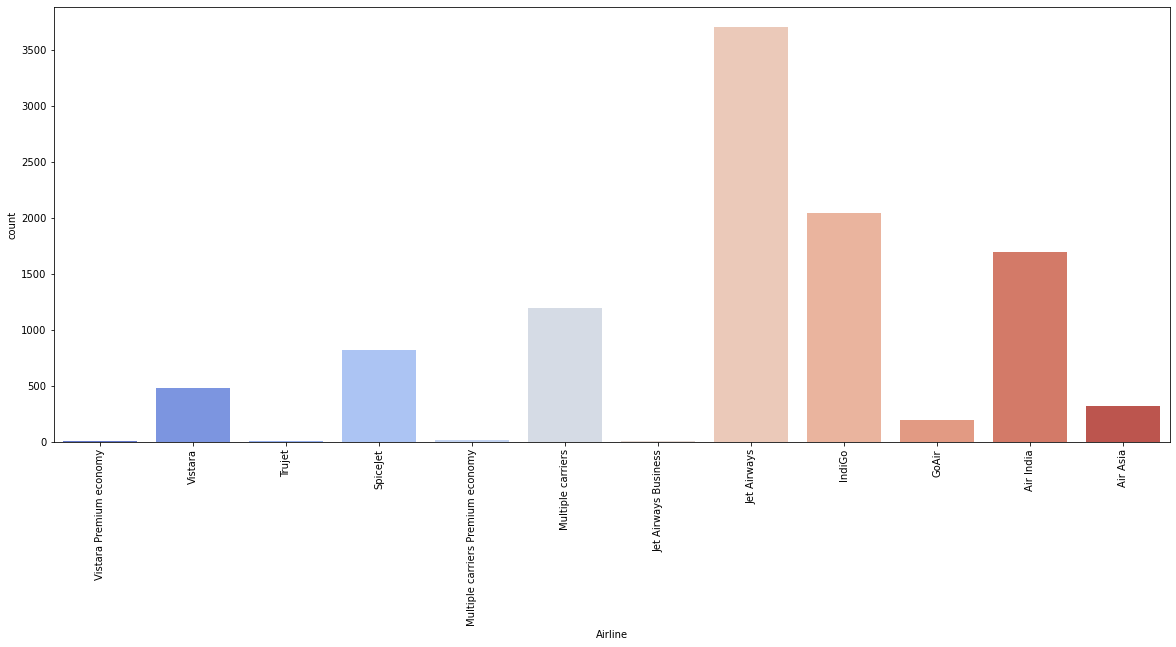

In [11]:
# 1. Airline - The name of the airline
plt.rcParams['figure.figsize'] = (20,8)
sns.countplot(data['Airline'].sort_values(ascending = False), palette = 'coolwarm')
plt.xticks(rotation = 90)

Vistara Premium economy, Trujet and Multiple carriers Premium economy, Jet Airway Business has least flights booked

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

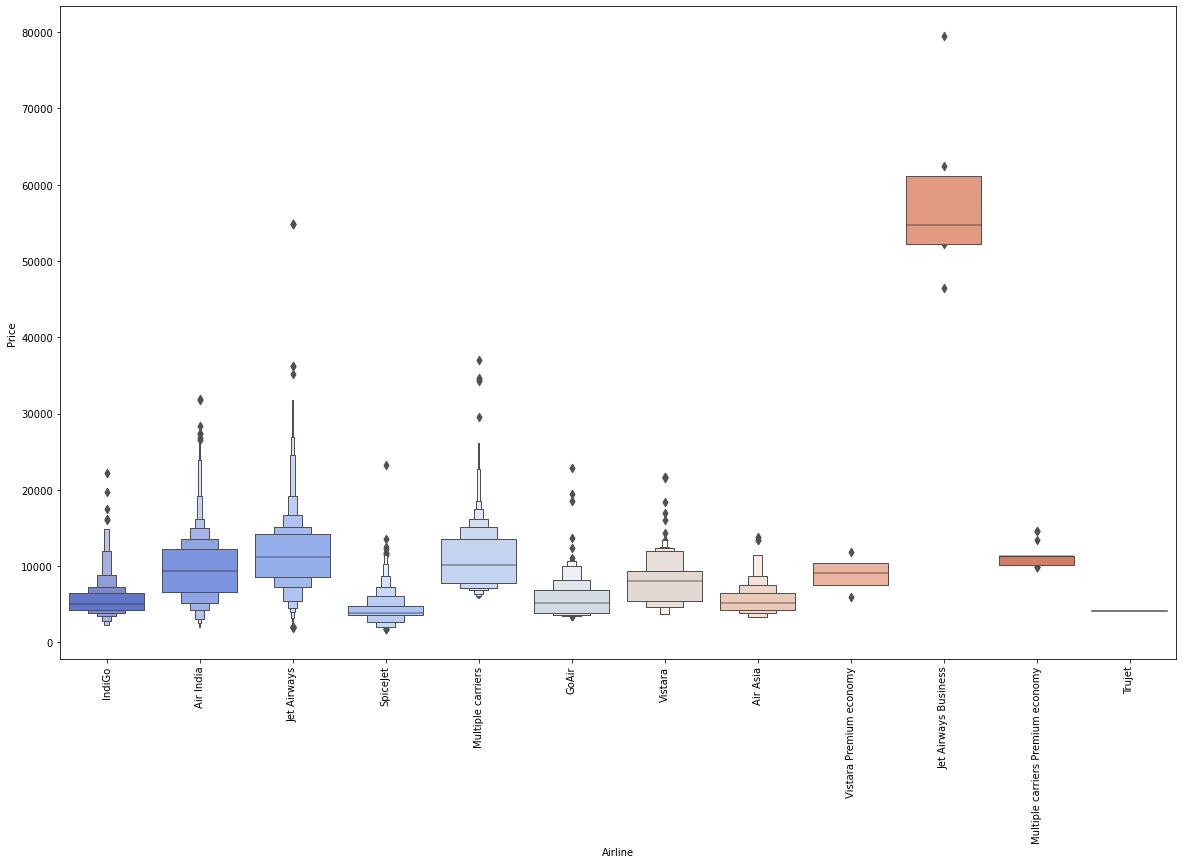

In [12]:
# Airline by Price
plt.rcParams['figure.figsize'] = (20,12)
sns.boxenplot(x = data['Airline'], y = data['Price'], palette = 'coolwarm')
plt.xticks(rotation = 90)

Ticket Price for Jet Airways Business is high

D:\Program Files\Anaconda\envs\FlightPricePrediction-Regression\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Date_of_Journey', ylabel='count'>

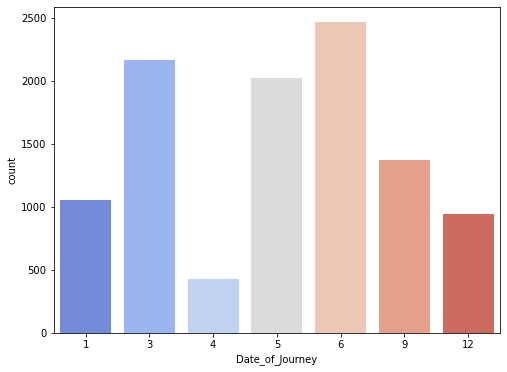

In [13]:
# 2. Date of Journey - The date of the journey
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(pd.to_datetime(data['Date_of_Journey']).dt.month, palette = 'coolwarm')

In [14]:
# March, May and June can be considered as peak season

D:\Program Files\Anaconda\envs\FlightPricePrediction-Regression\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Source', ylabel='Price'>

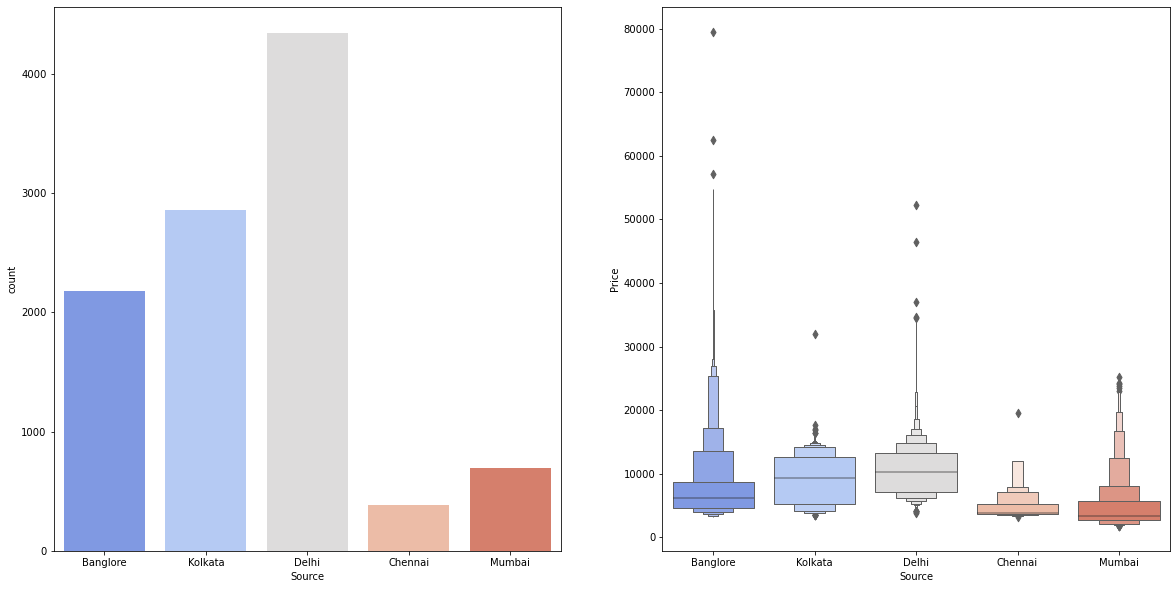

In [15]:
# 3. Source: The source from which the service begins
plt.rcParams['figure.figsize'] = (20,10)

plt.subplot(121)
sns.countplot(data['Source'], palette = 'coolwarm')

plt.subplot(122)
sns.boxenplot(x = data['Source'], y = data['Price'], palette = 'coolwarm')


D:\Program Files\Anaconda\envs\FlightPricePrediction-Regression\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Destination', ylabel='Price'>

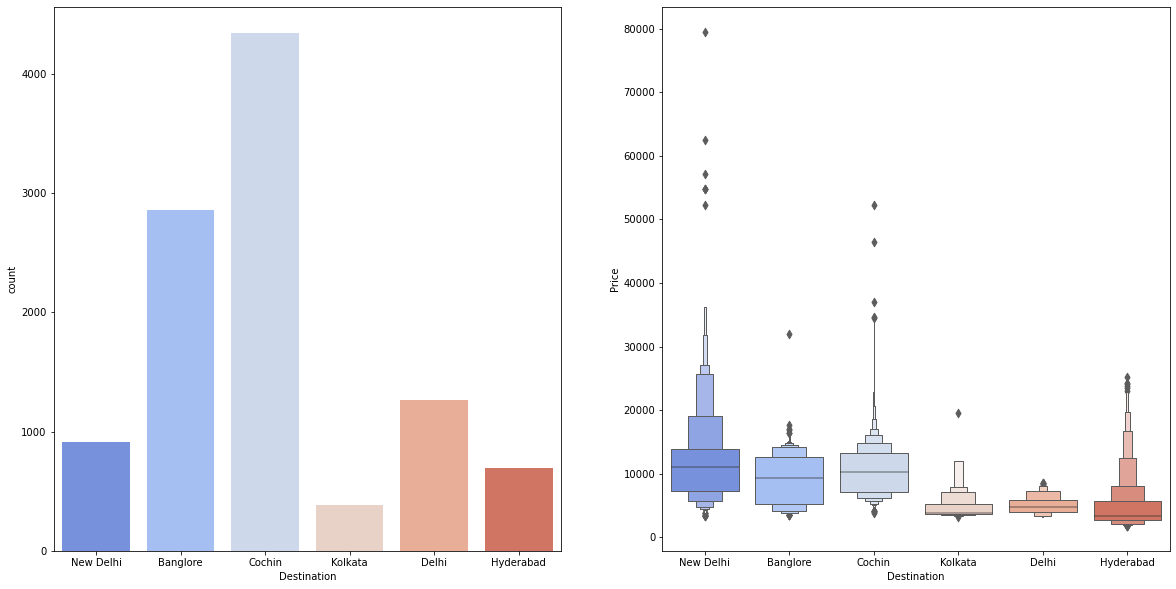

In [16]:
# 4. Destination: The destination from which the service begins
plt.rcParams['figure.figsize'] = (20,10)

plt.subplot(121)
sns.countplot(data['Destination'], palette = 'coolwarm')

plt.subplot(122)
sns.boxenplot(x = data['Destination'], y = data['Price'], palette = 'coolwarm')


<AxesSubplot:xlabel='Route', ylabel='Price'>

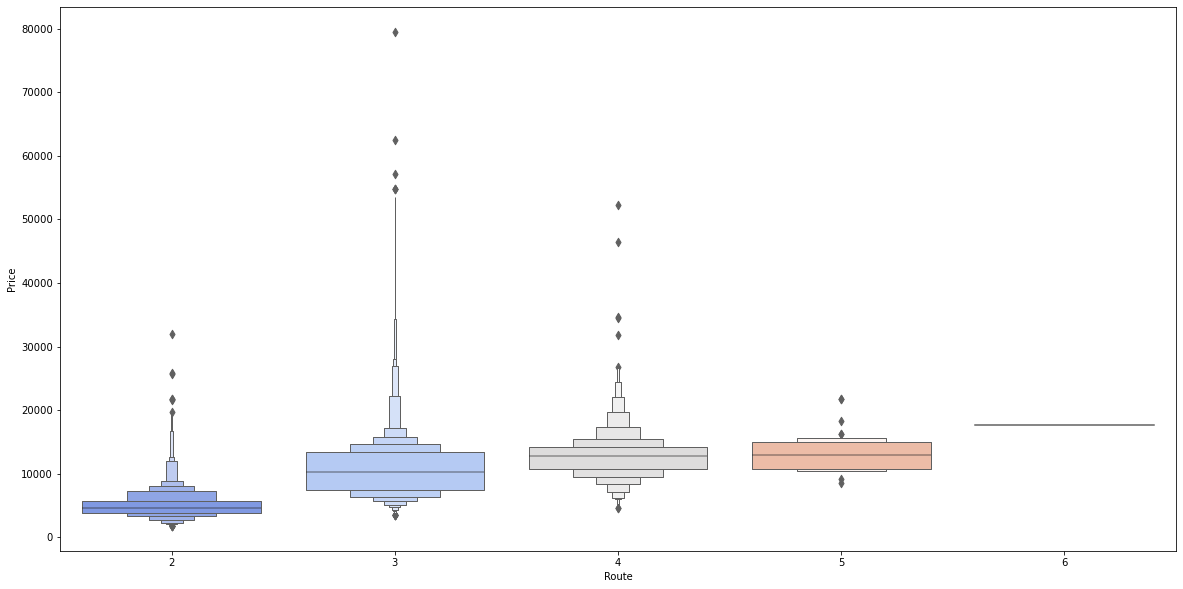

In [17]:
# 5. Route: The route taken by the flight to reach the destination
sns.boxenplot(x = data['Route'].str.split('→').str.len(), y = data['Price'], palette = 'coolwarm')

Airlines have 3 or 4 stops are more expensive

D:\Program Files\Anaconda\envs\FlightPricePrediction-Regression\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Dep_Time', ylabel='count'>

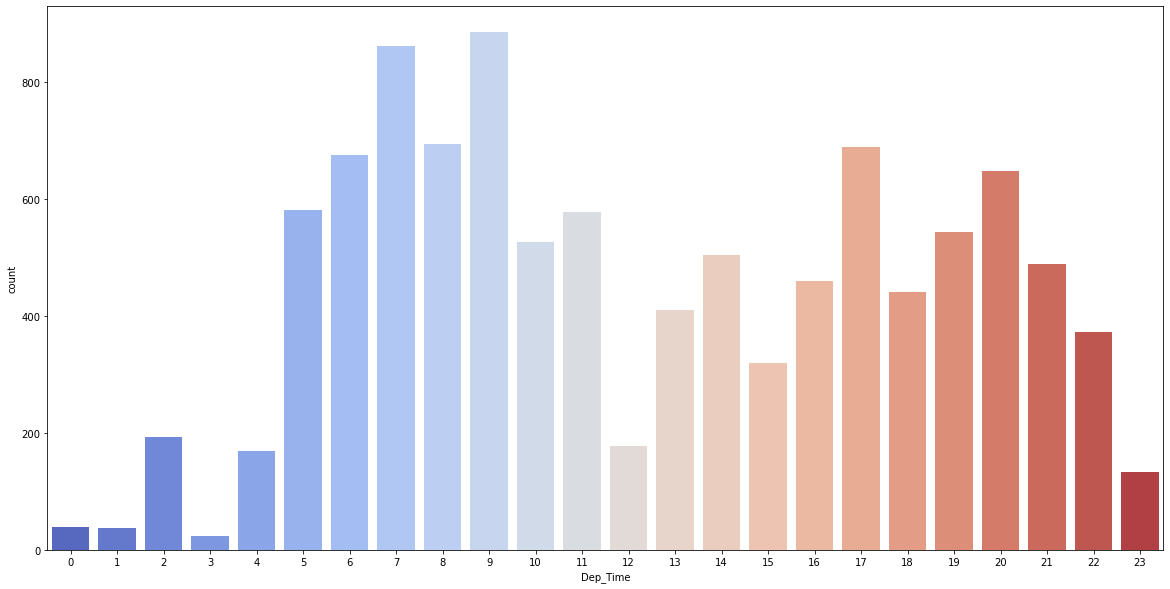

In [18]:
# 6. Dep_Time: The time when the journey starts from the source
sns.countplot(pd.to_datetime(data['Dep_Time']).dt.hour, palette = 'coolwarm')

<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

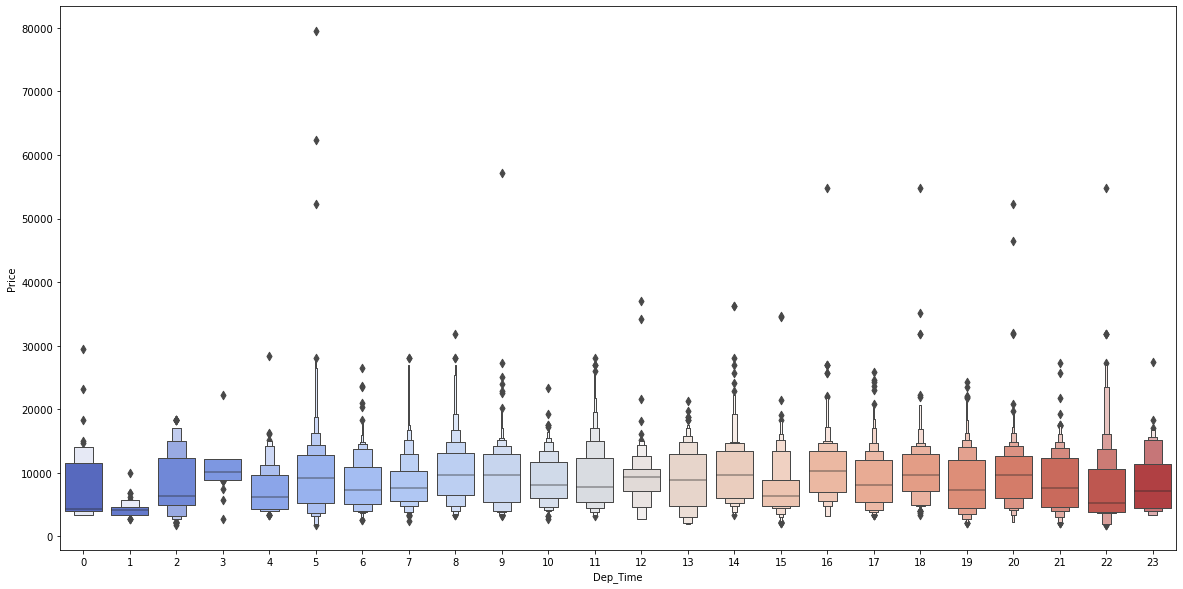

In [19]:
sns.boxenplot(x = pd.to_datetime(data['Dep_Time']).dt.hour, y = data['Price'], palette = 'coolwarm')

D:\Program Files\Anaconda\envs\FlightPricePrediction-Regression\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Dep_Time', ylabel='count'>

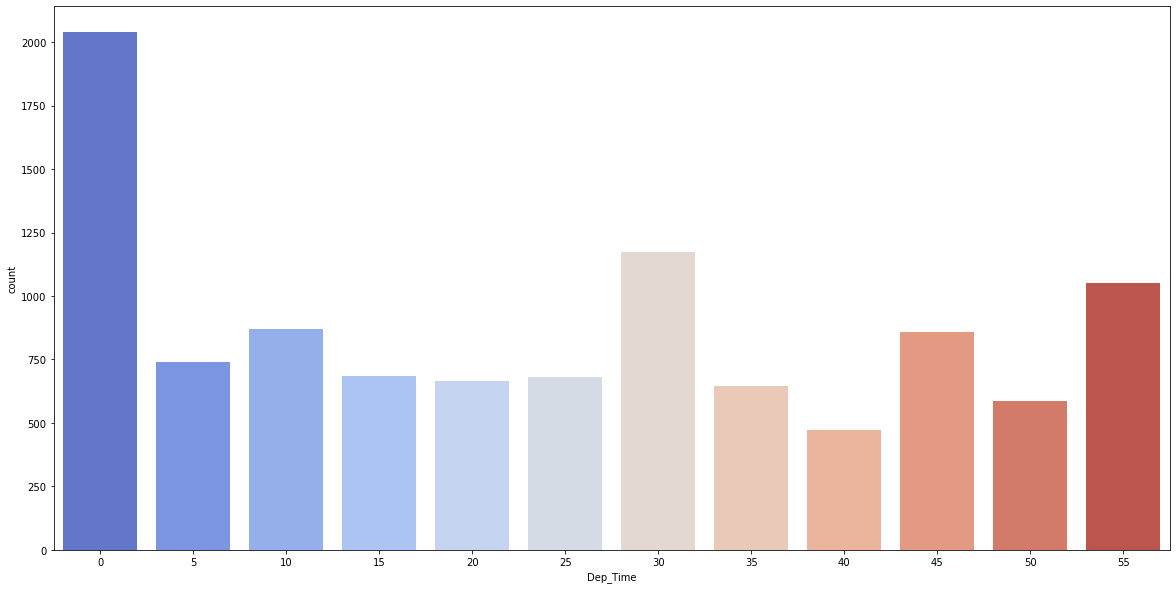

In [20]:
sns.countplot(pd.to_datetime(data['Dep_Time']).dt.minute, palette = 'coolwarm')

<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

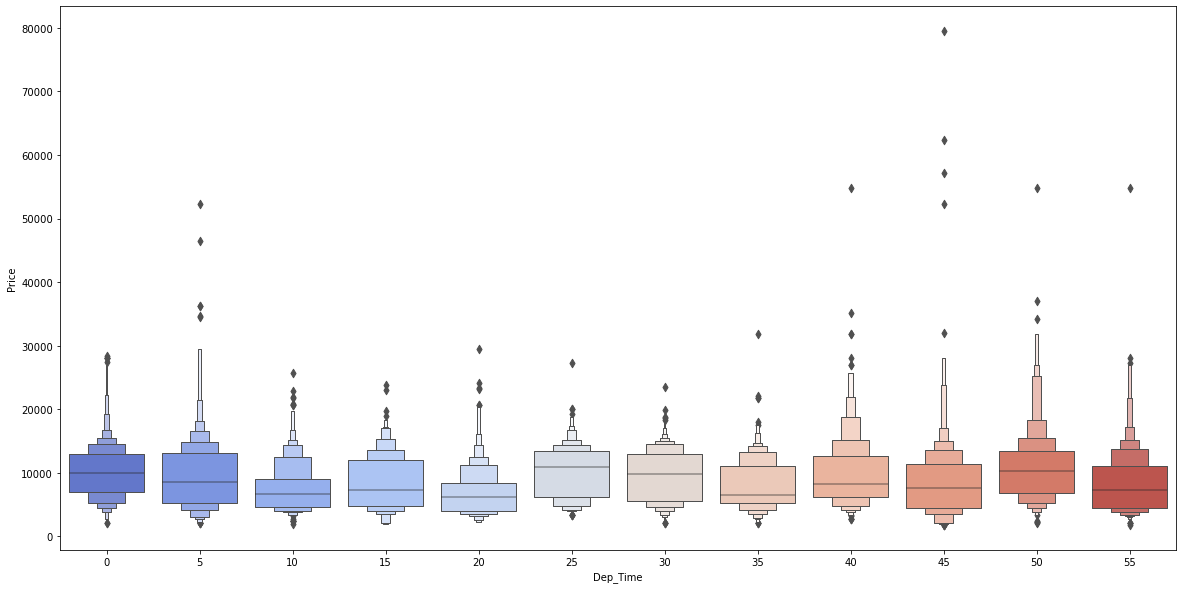

In [21]:
sns.boxenplot(x = pd.to_datetime(data['Dep_Time']).dt.minute, y = data['Price'], palette = 'coolwarm')

D:\Program Files\Anaconda\envs\FlightPricePrediction-Regression\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Arrival_Time', ylabel='count'>

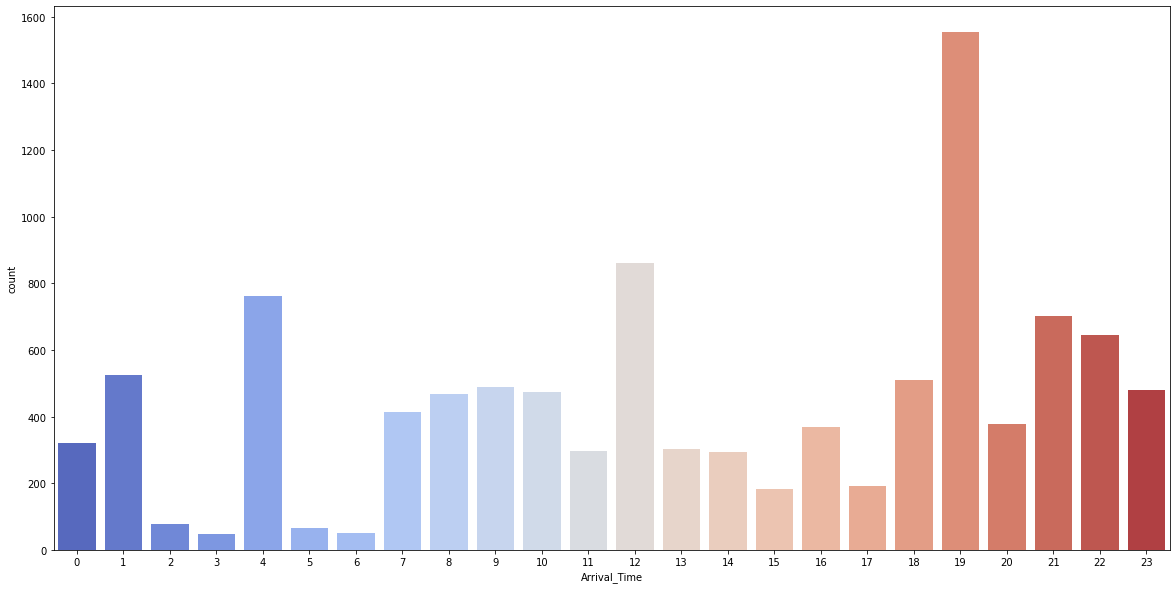

In [22]:
# 7. Arrival_Time: Time of arrival at the destination
sns.countplot(pd.to_datetime(data['Arrival_Time']).dt.hour, palette = 'coolwarm')

<AxesSubplot:xlabel='Arrival_Time', ylabel='Price'>

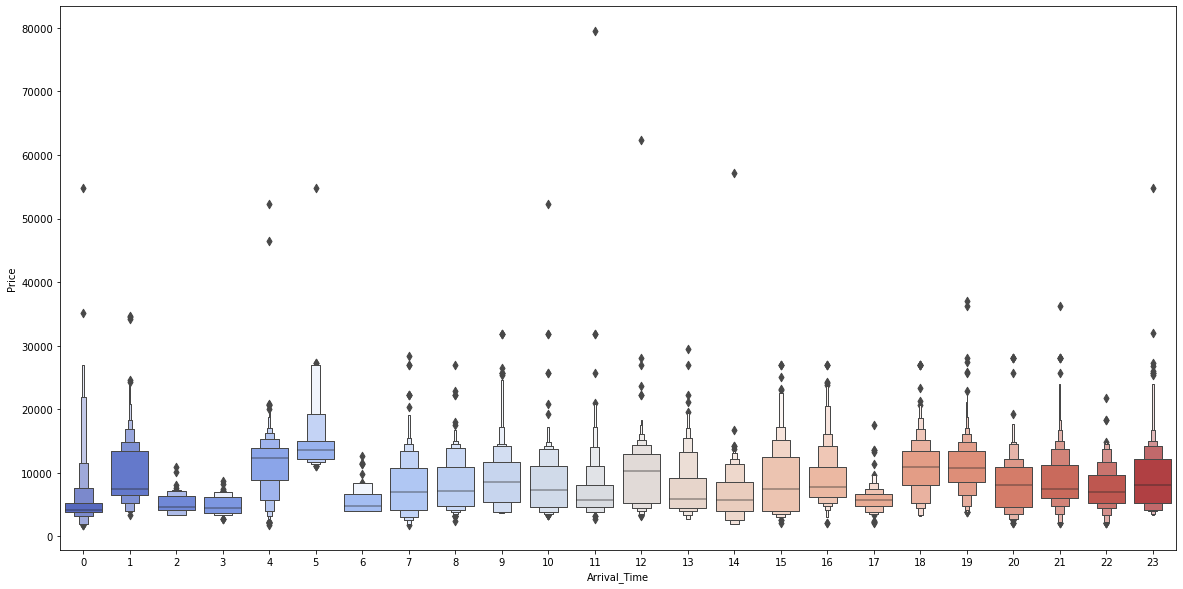

In [23]:
sns.boxenplot(x = pd.to_datetime(data['Arrival_Time']).dt.hour, y = data['Price'], palette = 'coolwarm')

Arrival time around midnight 2 and 3 are having lower ticket price, as well as arrival time evening 5 PM

D:\Program Files\Anaconda\envs\FlightPricePrediction-Regression\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Arrival_Time', ylabel='count'>

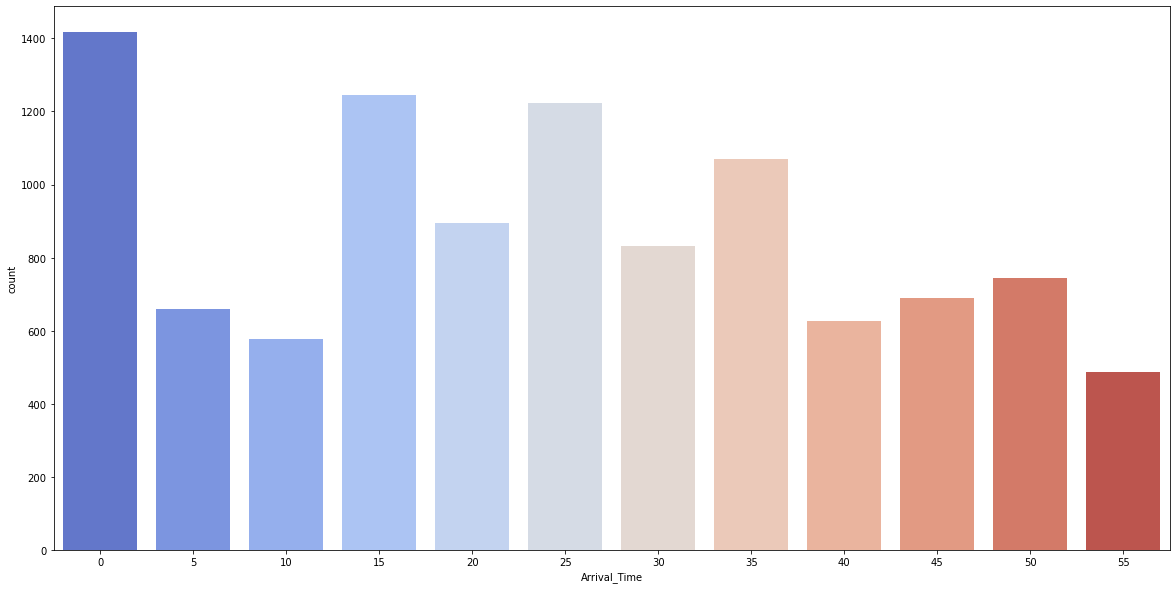

In [24]:
sns.countplot(pd.to_datetime(data['Arrival_Time']).dt.minute, palette = 'coolwarm')

<AxesSubplot:xlabel='Arrival_Time', ylabel='Price'>

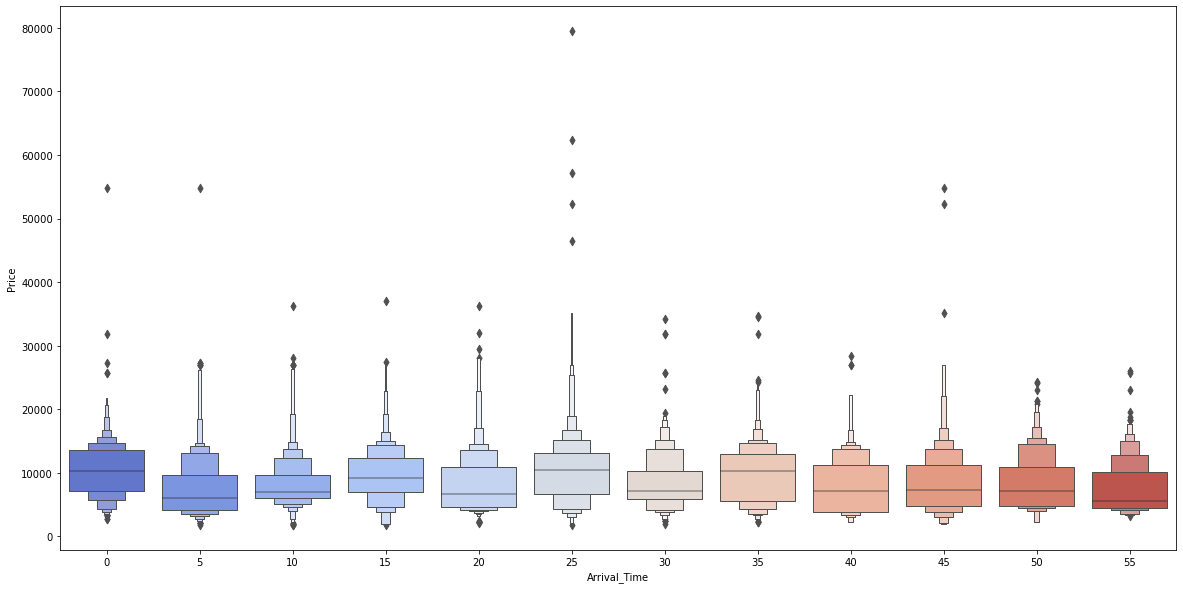

In [25]:
sns.boxenplot(x = pd.to_datetime(data['Arrival_Time']).dt.minute, y = data['Price'], palette = 'coolwarm')

In [26]:
# 8. Duration
data['Duration'].sample(5)

3297     28h 50m
173       9h 30m
10057    20h 25m
9130          3h
9663     15h 55m
Name: Duration, dtype: object

In [27]:
def calculate_duration(duration):
    tokens = duration.split(' ')
    if len(tokens) == 2:
        hour = int(tokens[0].split('h')[0]) * 60
        minute = int(tokens[1].split('m')[0])
        return hour + minute
    else:
        if 'h' in duration:
            return int(duration.split('h')[0]) * 60
        else:
            return int(duration.split('m')[0])

Text(0.5, 0, 'Duration in Minutes')

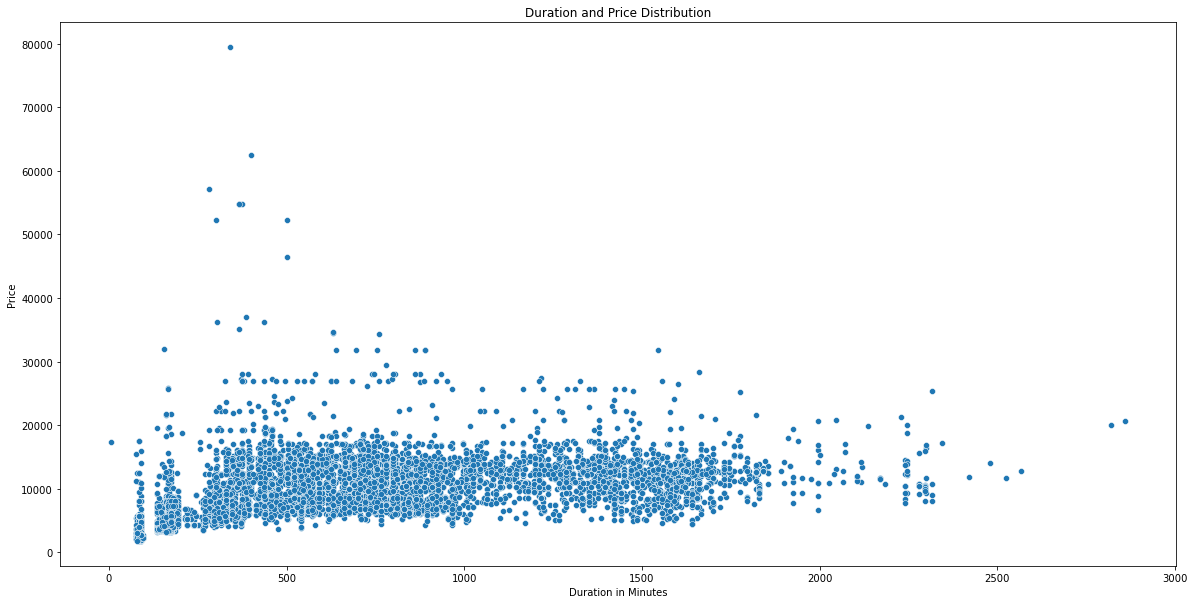

In [28]:
sns.scatterplot(x = data['Duration'].apply(calculate_duration), y = data['Price'])
plt.title('Duration and Price Distribution')
plt.xlabel('Duration in Minutes')

D:\Program Files\Anaconda\envs\FlightPricePrediction-Regression\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

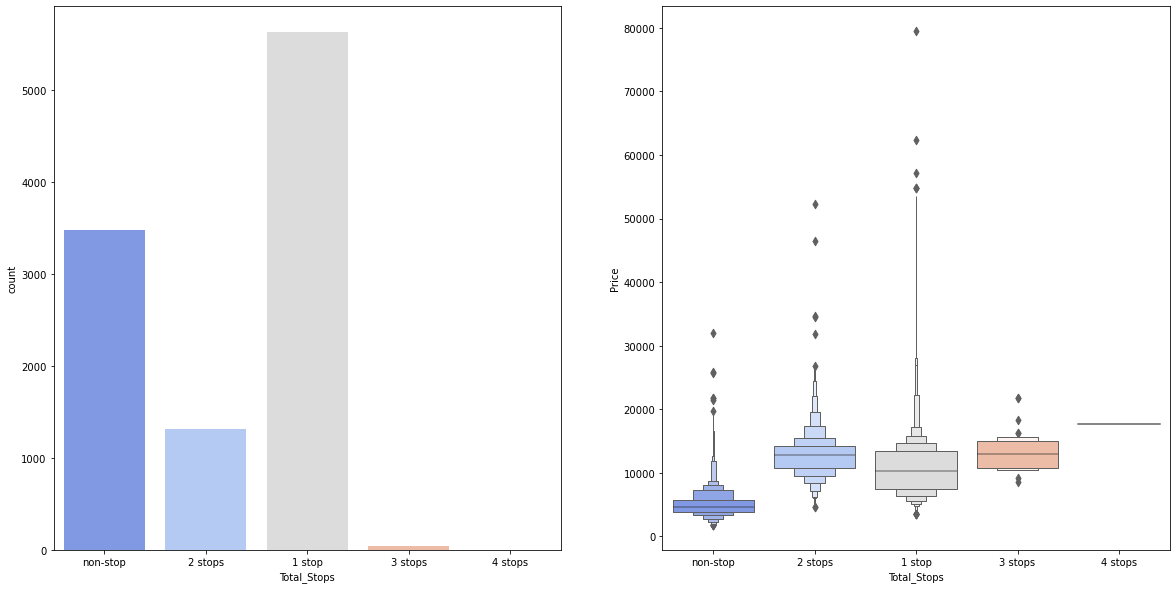

In [29]:
# 9. Total Stops: Total stops between the source and destination
plt.subplot(121)
sns.countplot(data['Total_Stops'], palette = 'coolwarm')

plt.subplot(122)
sns.boxenplot(x = data['Total_Stops'], y = data['Price'], palette = 'coolwarm')

One Stop & Two Stop are having more costly Ticket. Non-stop is cheapest

D:\Program Files\Anaconda\envs\FlightPricePrediction-Regression\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

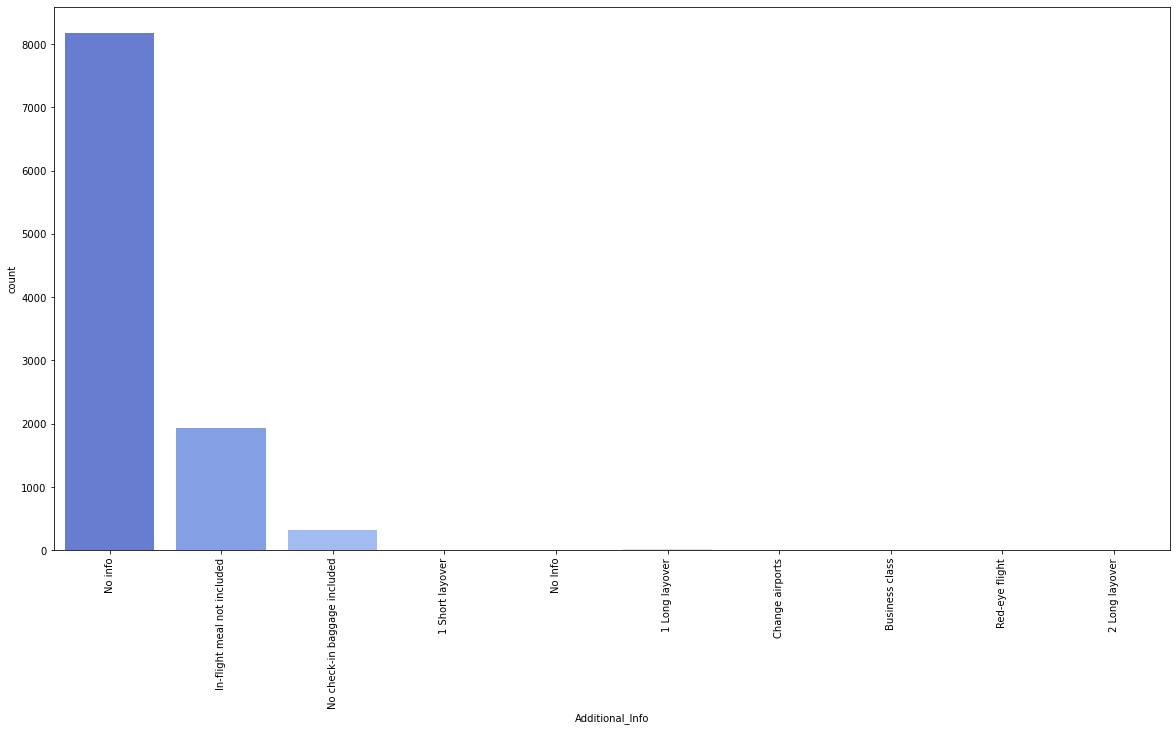

In [30]:
# 10. Additional_Info: Additional information about the flight
sns.countplot(data['Additional_Info'], palette = 'coolwarm')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'No info'),
  Text(1, 0, 'In-flight meal not included'),
  Text(2, 0, 'No check-in baggage included'),
  Text(3, 0, '1 Short layover'),
  Text(4, 0, 'No Info'),
  Text(5, 0, '1 Long layover'),
  Text(6, 0, 'Change airports'),
  Text(7, 0, 'Business class'),
  Text(8, 0, 'Red-eye flight'),
  Text(9, 0, '2 Long layover')])

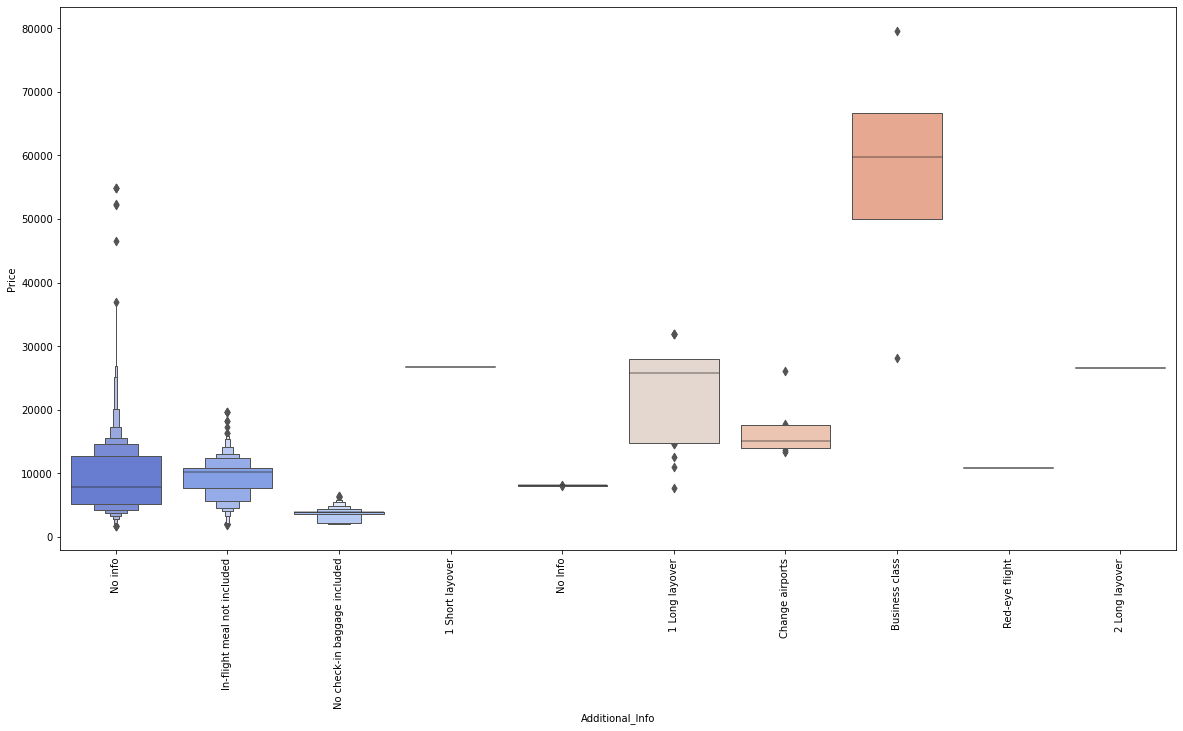

In [31]:
sns.boxenplot(x = data['Additional_Info'], y = data['Price'], palette = 'coolwarm')
plt.xticks(rotation = 90)

The price is high for Business class, In-flight meal not included & 
No check-in baggage included are having affect on price too


D:\Program Files\Anaconda\envs\FlightPricePrediction-Regression\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.82175892, -3.59722601, -3.47398465, ...,  3.47398465,
          3.59722601,  3.82175892]),
  array([ 1759,  1759,  1759, ..., 57209, 62427, 79512], dtype=int64)),
 (4368.94588149468, 9026.790288663733, 0.9443883547492932))

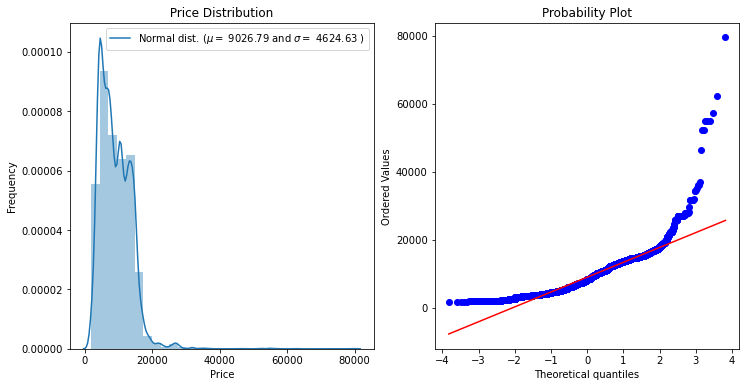

In [32]:
# 11. Price: The price of the ticket (Target Feature)

plt.rcParams['figure.figsize'] = (12,6)
plt.subplot(121)
(mu, sigma) = norm.fit(data['Price'])
sns.distplot(data['Price'], kde = True, bins = 30)
plt.ylabel('Frequency')
plt.title(' Price Distribution ')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

plt.subplot(122)
probplot(data['Price'],plot = plt)

Here we see the Price data is right skewed, we might need to transform the Price data

# 3. Feature Engineering

In [33]:
# 1. Airline
data['Airline'].replace({'Multiple carriers Premium economy' : 'Other',
                        'Jet Airways Business' : 'Other',
                        'Vistara Premium economy' : 'Other',
                        'Trujet' : 'Other'}, inplace = True)

categorical_feature = ['Airline']

In [34]:
# 2. Date of Journey

data['Journey_Month'] =pd.to_datetime(data['Date_of_Journey']).dt.month.astype(int)
data['Journey_Day'] =pd.to_datetime(data['Date_of_Journey']).dt.day.astype(int)

In [35]:
# 3. Source
categorical_feature.append(['Source'])

In [36]:
# 4. Destination
categorical_feature.append(['Destination'])

In [37]:
# 5. Route
# categorical_feature.append(['Route'])

In [38]:
# 6. Departure Time
data['Departure_Hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Departure_Minute'] = pd.to_datetime(data['Dep_Time']).dt.minute

In [39]:
# 7. Arrival Time
data['Arrival_Hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_Minute'] = pd.to_datetime(data['Arrival_Time']).dt.minute

In [40]:
# 8. Duration
data['Duration'] = data['Duration'].apply(calculate_duration)

In [41]:
# 9. Total Stops
data['Total_Stops'].replace({'non-stop' : 0, '1 stop' : 1, '2 stops' : 2, '3 stops' : 3, '4 stops' : 4}, inplace = True)

In [42]:
# 10. Additional Info
data['Additional_Info'].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)
categorical_feature.append(['Additional_Info'])

In [43]:
data.drop(['Dep_Time','Arrival_Time','Date_of_Journey','Route'], axis = 'columns', inplace = True)

In [44]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,170,0,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,No info,7662,1,5,5,50,13,15


<AxesSubplot:>

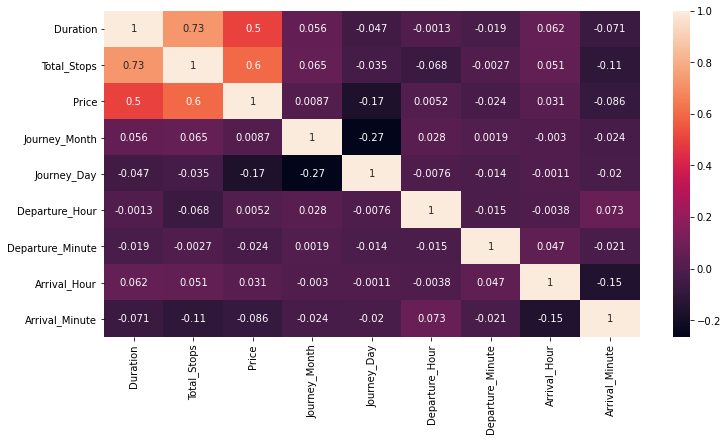

In [45]:
sns.heatmap(data.corr(), annot = True)

In [46]:
# One Hot Encoding for categorical feature 
for feature in categorical_feature:
    data = pd.concat([pd.get_dummies(data[feature]), data], axis = 'columns')

In [47]:
data = data.drop(['Airline', 'Source', 'Destination', 'Additional_Info'], axis = 'columns')

In [48]:
# Label Encoding of Categorical feature
# label_encoder = LabelEncoder()
# for feature in categorical_feature:
#     data[feature] = label_encoder.fit_transform(data[feature])

In [49]:
# 11. Price: Log Transformation for Price (Target)
data['Price'] = np.log1p(data['Price'])

D:\Program Files\Anaconda\envs\FlightPricePrediction-Regression\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.82175892, -3.59722601, -3.47398465, ...,  3.47398465,
          3.59722601,  3.82175892]),
  array([ 7.47306909,  7.47306909,  7.47306909, ..., 10.95448399,
         11.04176917, 11.28367581])),
 (0.5096474333221823, 8.981484073806365, 0.9897699448567386))

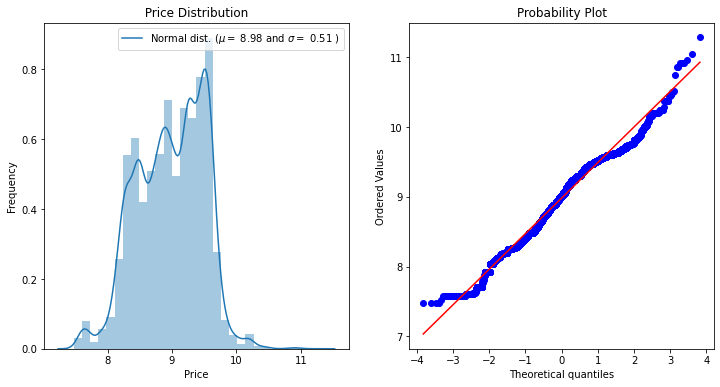

In [50]:
plt.rcParams['figure.figsize'] = (12,6)
plt.subplot(121)
(mu, sigma) = norm.fit(data['Price'])
sns.distplot(data['Price'], kde = True, bins = 30)
plt.ylabel('Frequency')
plt.title(' Price Distribution ')
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')

plt.subplot(122)
probplot(data['Price'],plot = plt)

In [51]:
data.head(3)

,Additional_Info_1 Long layover,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Other,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,...,Vistara,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Departure_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,0,0,0,0,1,0,0,0,0,0,...,0,170,0,8.268219,3,24,22,20,1,10
1,0,0,0,0,1,0,1,0,0,0,...,0,445,2,8.944159,1,5,5,50,13,15
2,0,0,0,0,1,0,0,1,0,0,...,0,1140,2,9.538420,9,6,9,25,4,25


In [52]:
# Split data to independent & dependent feature
X = data.drop(['Price'], axis = 'columns')
y = data['Price']

In [53]:
# Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [60]:
# Train the model - XG Boost
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Score : ', score)
print('RMSE : ', rmse)

[20:54:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Score :  0.870275001029031
RMSE :  0.18618141619512774


In [61]:
# Hyper parameter tunning
params = {'learning_rate':[0.01,0.05,0.1],'max_depth':[1,2,3],'n_estimators':[100,200,500]}
best_xgb = GridSearchCV(xgb, param_grid = params, cv = 5, n_jobs = -1)
best_xgb.fit(X, y)
print(best_xgb.best_score_)
print(best_xgb.best_params_)


[20:56:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9117751332080486
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [63]:
gbm = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 500)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Score : ', score)
print('RMSE : ', rmse)

Score :  0.9085830892478038
RMSE :  0.15629236468466612


In [54]:
# Train the model - Gradient Boosting
gbm = GradientBoostingRegressor()
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Score : ', score)
print('RMSE : ', rmse)

Score :  0.871189441963542
RMSE :  0.18552405253650864


In [ ]:
# Hyper parameter tunning
params = {'learning_rate':[0.01,0.05,0.1],'max_depth':[3,5,7],'n_estimators':[500,1000]}

best_gbm = GridSearchCV(gbm, param_grid = params, cv = 5, n_jobs = -1)
best_gbm.fit(X, y)
print(best_gbm.best_score_)
print(best_gbm.best_params_)


In [64]:
gbm = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 7, n_estimators = 500)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
score = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Score : ', score)
print('RMSE : ', rmse)


Score :  0.9421237929594214
RMSE :  0.12435822719741997


* Best score for GradientBoostingRegressor r2_score = 0.945, RMSE = 0.1243 with learning_rate = 0.05, max_depth = 7, n_estimators = 500
* Best score for XG Boost r2_score = 0.908, RMSE = 0.1562 with learning_rate =  0.1, max_depth = 3, n_estimators = 500}